In [2]:
# Step 1: Import necessary library
import pandas as pd

# Step 2: Load your traffic dataset
df = pd.read_csv('traffic_volume.csv')  # make sure the CSV is in the same folder

# Step 3: Display first few rows
df.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [3]:
# Check for missing values in the dataset
df.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [4]:
# Fill missing values the future-safe way
df['holiday'] = df['holiday'].fillna('None')
df['temp'] = df['temp'].fillna(df['temp'].mean())
df['rain'] = df['rain'].fillna(0)
df['snow'] = df['snow'].fillna(0)
df['weather'] = df['weather'].fillna(df['weather'].mode()[0])

df.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [5]:
import sys
!{sys.executable} -m pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


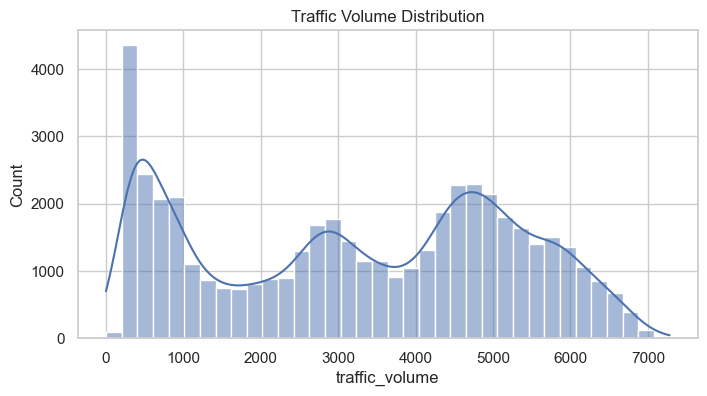

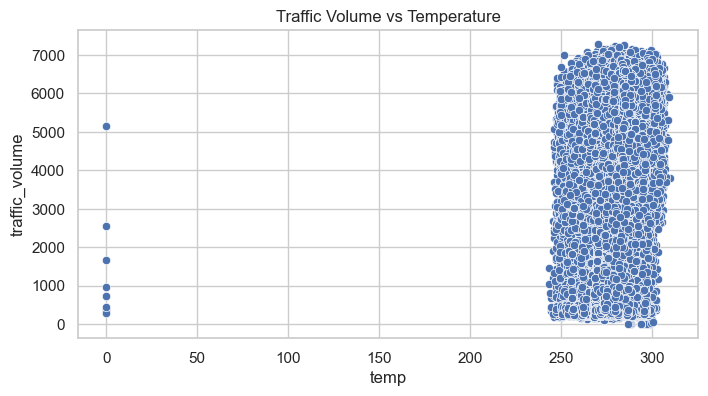

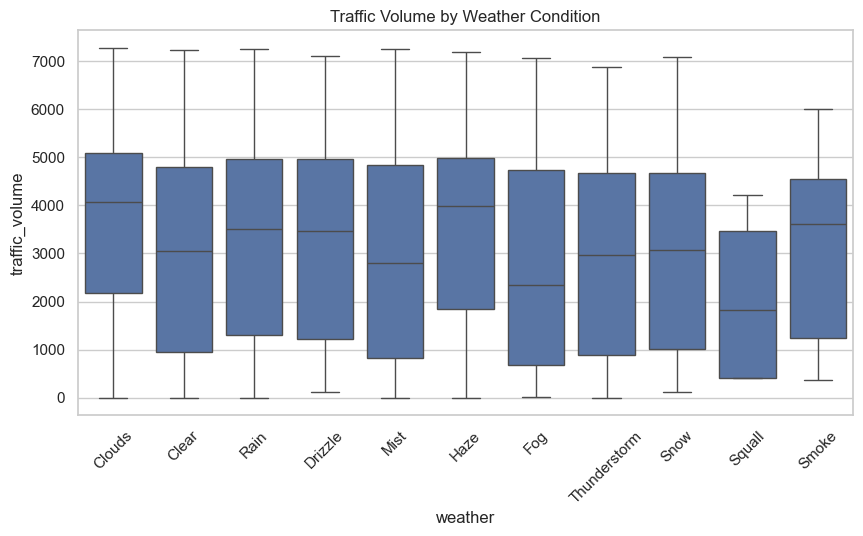

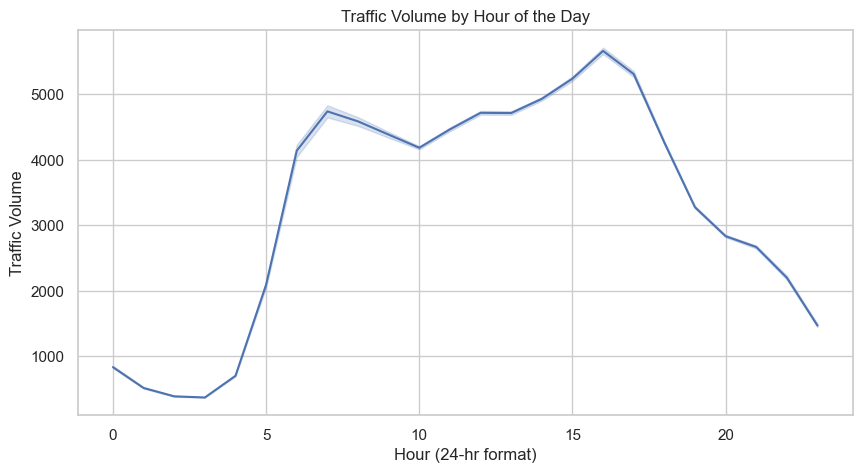

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Traffic volume distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Traffic Volume Distribution')
plt.show()

# 2. Traffic volume vs temperature
plt.figure(figsize=(8, 4))
sns.scatterplot(x='temp', y='traffic_volume', data=df)
plt.title('Traffic Volume vs Temperature')
plt.show()

# 3. Traffic volume by weather type
plt.figure(figsize=(10, 5))
sns.boxplot(x='weather', y='traffic_volume', data=df)
plt.xticks(rotation=45)
plt.title('Traffic Volume by Weather Condition')
plt.show()

# Convert 'Time' column to hour
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Plot traffic volume by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='traffic_volume', data=df)
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour (24-hr format)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [7]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

# Step 1: Load your dataset
df = pd.read_csv('traffic_volume.csv')  # Update if your filename is different

# Step 2: Handle missing values and preprocess
df['holiday'] = df['holiday'].fillna('none').astype(str).str.lower()
df['weather'] = df['weather'].fillna('clear').astype(str).str.lower()

# Step 3: Encode categorical features
le_holiday = LabelEncoder()
le_weather = LabelEncoder()
df['holiday'] = le_holiday.fit_transform(df['holiday'])
df['weather'] = le_weather.fit_transform(df['weather'])

# Step 4: Extract time components from 'date' and 'Time'
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)  # Adjust format if needed
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Handle Time
df['hour'] = df['Time'].str.split(':').str[0].astype(int)
df['minutes'] = df['Time'].str.split(':').str[1].astype(int)
df['seconds'] = df['Time'].str.split(':').str[2].astype(int)

# Step 5: Drop missing values (if any left)
df = df.dropna()

# Step 6: Feature selection
X = df[['holiday', 'temp', 'rain', 'snow', 'weather', 'year', 'month', 'day', 'hour', 'minutes', 'seconds']]
y = df['traffic_volume']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 10: Save model and encoders
joblib.dump(model, 'model.pkl')
joblib.dump(le_holiday, 'holiday_encoder.pkl')
joblib.dump(le_weather, 'weather_encoder.pkl')
joblib.dump(scaler, 'scale.pkl')

# Step 11: Confirmation
print("✅ Model and all tools saved successfully!")
print("Holiday encoder classes:", le_holiday.classes_)
print("Weather encoder classes:", le_weather.classes_)


✅ Model and all tools saved successfully!
Holiday encoder classes: ['christmas day' 'columbus day' 'independence day' 'labor day'
 'martin luther king jr day' 'memorial day' 'new years day' 'none'
 'state fair' 'thanksgiving day' 'veterans day' 'washingtons birthday']
Weather encoder classes: ['clear' 'clouds' 'drizzle' 'fog' 'haze' 'mist' 'rain' 'smoke' 'snow'
 'squall' 'thunderstorm']


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 2: Predict on test data
y_pred = model.predict(X_test_scaled)

# Step 3: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 3399717.95
R² Score: 0.13


In [15]:
import os
print(os.listdir())


['scale.pkl', '.DS_Store', 'Untitled.ipynb', 'traffic_volume.csv', 'weather_encoder.pkl', 'model.pkl', 'static', 'app.py', 'holiday_encoder.pkl', 'templates', '.ipynb_checkpoints', 'traffic.webp', 'traffic_volume.ipynb']
